## 1. Write a Python program to simulate the following scenarios:  
###  a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.  
 
   ### a. Use Python's random module for simulations.  
   ### b. Implement loops for repeated trials.  
   ### c. Track outcomes and compute probabilities.  


In [5]:
import random

# Number of coin tosses
tosses = 10000

# Counters
heads = 0
tails = 0

# Simulate coin tosses
for _ in range(tosses):
    if random.choice(["H", "T"]) == "H":
        heads += 1
    else:
        tails += 1

# Experimental probabilities
prob_heads = heads / tosses
prob_tails = tails / tosses

# Output results
print(f"Heads: {heads}")
print(f"Tails: {tails}")
print(f"Experimental Probability of Heads: {prob_heads}")
print(f"Experimental Probability of Tails: {prob_tails}")


Heads: 4945
Tails: 5055
Experimental Probability of Heads: 0.4945
Experimental Probability of Tails: 0.5055


###  b. Rolling two dice and computing the probability of getting a sum of 7  

In [18]:
from fractions import Fraction
from itertools import product

Sum = 7
#  Rolling two dice Outcome
dice_outecomes = list(product(range(1,7),repeat =2))
print(f"dice_outcoms: {dice_outecomes}")

#  Rolling two dice sum 7 Outcomes
outecomse_7_sum = [pair for pair in dice_outecomes if sum(pair) == 7]
print(f"getting a sum of 7 Pair in two Dice:{outecomse_7_sum}")

#  Rolling two dice sum 7 Count
print(f"getting a sum of 7 Pair in two Dice Sum:{len(outecomse_7_sum)}")

#  Rolling two dice sum 7 Probablity
print(f"probability of getting a sum of 7 :{Fraction(len(outecomse_7_sum),len(dice_outecomes))}")


dice_outcoms: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
getting a sum of 7 Pair in two Dice:[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
getting a sum of 7 Pair in two Dice Sum:6
probability of getting a sum of 7 :1/6


# 2. Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die. 
 Steps  
      a. Simulate rolling a die 10 times using a loop.  
      b. Track trials where at least one "6" occurs.  
      c. Calculate the proportion of successful trials.


In [5]:
import random

def estimate_probability(num_trials=100000):
    success = 0

    for _ in range(num_trials):
        rolls = [random.randint(1, 6) for _ in range(10)]
        if 6 in rolls:
            success += 1

    return success / num_trials

# Example usage
print(estimate_probability())


0.83714


### Probability that a “6” does not occur = 5/6

### Probability that a “6” does not occur in 10 consecutive rolls = (5/6)¹⁰

### Probability of getting at least one “6” = 1 − (5/6)¹⁰ ≈ 0.8385

# 3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate:  
  a. The probability of drawing a red ball given that the previous ball was blue.  



Steps  
    a. Use random sampling to simulate the process.  
    b. Compute conditional probabilities directly from the data.  




In [1]:
import random

# Ball colors in the bag
balls = ['Red'] * 5 + ['Green'] * 7 + ['Blue'] * 8

previous_blue_count = 0
red_after_blue = 0

# First draw
previous_ball = random.choice(balls)

# Repeat draws
for _ in range(999):
    current_ball = random.choice(balls)

    if previous_ball == 'Blue':
        previous_blue_count += 1
        if current_ball == 'Red':
            red_after_blue += 1

    previous_ball = current_ball

# Estimate probability
if previous_blue_count > 0:
    probability = red_after_blue / previous_blue_count
else:
    probability = 0

print("Estimated P(Red | Previous was Blue):", probability)


Estimated P(Red | Previous was Blue): 0.25542168674698795


#### P(Red | Previous was Blue) using 1000 repeated draws with replacement.
#### Total balls = 5 red, 7 green, 8 blue (20 total)
#### P(Red∣Previous Blue)=Red after Blue/Total Blue occurrences
#### P(Red∣Previous Blue)=P(Red)=5/20=0.25

###     b. Verify Bayes' theorem with the simulation results.  

In [5]:
import random

balls = ['Red'] * 5 + ['Green'] * 7 + ['Blue'] * 8
n = 1000
print(balls);
red_count = 0
blue_count = 0
red_after_blue = 0
blue_after_red = 0
blue_prev_count = 0
red_prev_count = 0

# First draw
previous = random.choice(balls)

for _ in range(n - 1):
    current = random.choice(balls)

    if current == 'Red':
        red_count += 1
    if current == 'Blue':
        blue_count += 1

    if previous == 'Blue':
        blue_prev_count += 1
        if current == 'Red':
            red_after_blue += 1

    if previous == 'Red':
        red_prev_count += 1
        if current == 'Blue':
            blue_after_red += 1

    previous = current

# Probability estimates
P_R = red_count / n
P_B = blue_count / n
P_R_given_B = red_after_blue / blue_prev_count
P_B_given_R = blue_after_red / red_prev_count
print(f"Probability of Red:{P_R}")
print(f"Probability of Blue:{P_B}")
print(f"Probability of R Given B :{P_R_given_B}")
print(f"Probability of B Given R : {P_B_given_R}")
# Bayes RHS
bayes_rhs = (P_B_given_R * P_R) / P_B

print("P(R | B) [LHS]:", P_R_given_B)
print("Bayes RHS:", bayes_rhs)


['Red', 'Red', 'Red', 'Red', 'Red', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue']
Probability of Red:0.256
Probability of Blue:0.411
Probability of R Given B :0.2725060827250608
Probability of B Given R : 0.4453125
P(R | B) [LHS]: 0.2725060827250608
Bayes RHS: 0.2773722627737227


### P(R∣B)=(P(B∣R)P(R))/P(B)

# 4. Generate a sample of size 1000 from a discrete random variable with the following distribution:  
  - P(X=1) = 0.25  
  - P(X=2) = 0.35  
  - P(X=3) = 0.4  
  Compute the empirical mean, variance, and standard deviation of the sample.  
  Steps  
      a. Use numpy.random.choice() to generate the sample.  
      b. Use numpy methods to calculate mean, variance, and standard deviation.


In [27]:
import numpy as np

# Step a: Generate the sample
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.40]
sample_size = 1000

sample = np.random.choice(values, size=sample_size, p=probabilities)

# Step b: Compute statistics
empirical_mean = np.mean(sample)
empirical_variance = np.var(sample)      # population variance
empirical_std = np.std(sample)            # population standard deviation

print("Empirical Mean:", empirical_mean)
print("Empirical Variance:", empirical_variance)
print("Empirical Standard Deviation:", empirical_std)


Empirical Mean: 2.124
Empirical Variance: 0.652624
Empirical Standard Deviation: 0.8078514714970816


# 5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:  
 ### a. A histogram.  
 ###  b. A probability density function (PDF) overlay.  
  Steps  
      a. Use numpy.random.exponential().  
      b. Use matplotlib to create visualizations.  




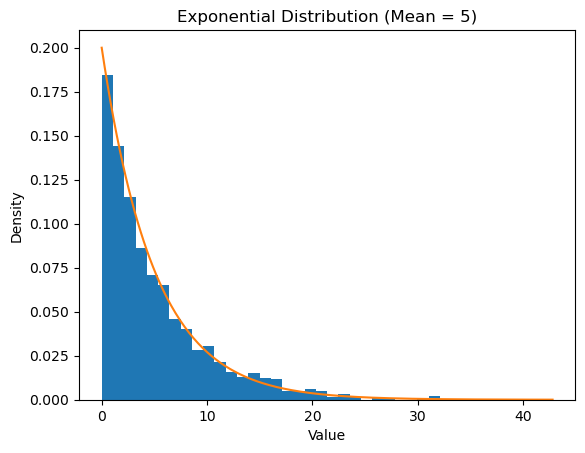

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Generate 2000 samples from exponential distribution (mean = 5)
np.random.seed(0)
samples = np.random.exponential(scale=5, size=2000)

# Plot histogram
plt.hist(samples, bins=40, density=True)

# PDF overlay
x = np.linspace(0, samples.max(), 300)
pdf = expon.pdf(x, scale=5)
plt.plot(x, pdf)

# Labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Exponential Distribution (Mean = 5)")

plt.show()


# 6. Simulate the Central Limit Theorem by following these steps  
##  a. Generate 10,000 random numbers from a uniform distribution.  
##  b. Draw 1000 samples of size n = 30.  
## c. Calculate and visualize the distribution of sample means.  
  Steps  
      a. Use numpy.random.uniform().  
      b. Plot both the uniform distribution and the sample mean distribution for comparison.
 


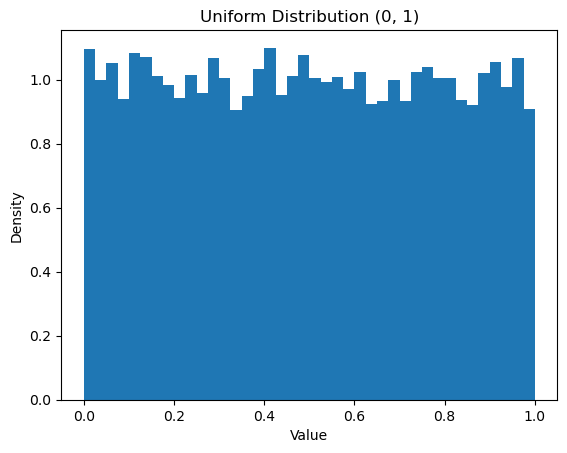

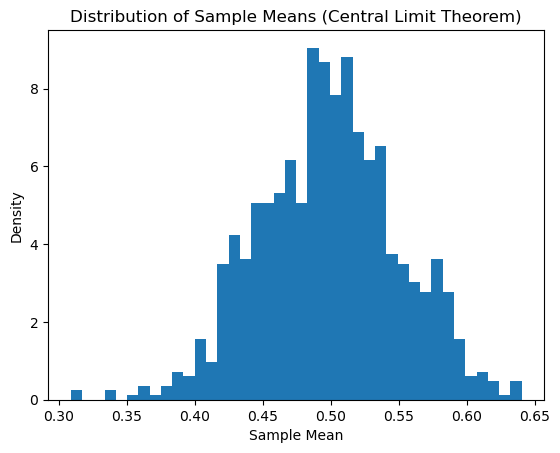

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Step a: Generate 10,000 random numbers from Uniform(0, 1)
np.random.seed(0)
uniform_data = np.random.uniform(0, 1, 10000)

# Plot the uniform distribution
plt.hist(uniform_data, bins=40, density=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Uniform Distribution (0, 1)")
plt.show()

# Step b: Draw 1000 samples of size n = 30
n = 30
num_samples = 1000

sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(uniform_data, size=n, replace=True)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# Step c: Plot distribution of sample means
plt.hist(sample_means, bins=40, density=True)
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Distribution of Sample Means (Central Limit Theorem)")
plt.show()
